In [2106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2107]:
df = pd.read_csv("train.csv", delimiter=";", thousands=',')

In [2108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7639 entries, 0 to 7638
Data columns (total 92 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   target         7639 non-null   int64  
 1   v2a1           7639 non-null   float64
 2   hacdor         7639 non-null   int64  
 3   rooms          7639 non-null   int64  
 4   hacapo         7639 non-null   int64  
 5   v14a           7639 non-null   int64  
 6   refrig         7639 non-null   int64  
 7   v18q1          7639 non-null   int64  
 8   r4h1           7639 non-null   int64  
 9   r4h2           7639 non-null   int64  
 10  r4m1           7639 non-null   int64  
 11  r4m2           7639 non-null   int64  
 12  escolari       7639 non-null   int64  
 13  pared1         7639 non-null   int64  
 14  pared2         7639 non-null   int64  
 15  pared3         7639 non-null   int64  
 16  pared4         7639 non-null   int64  
 17  pared5         7639 non-null   int64  
 18  pared6  

In [2109]:
df.head()

,target,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,r4h2,...,computer,television,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,rural,age
0,0,0.0,0,4,0,1,1,0,0,1,...,0,0,3,1,0,0,0,0,1,43
1,0,0.0,0,8,0,1,1,1,0,1,...,0,0,3,0,0,0,0,0,1,18
2,0,0.0,0,5,0,1,1,0,0,2,...,0,1,2,0,0,1,0,0,0,62
3,1,0.0,0,8,0,1,1,2,0,2,...,1,1,4,1,0,0,0,0,0,20
4,0,350000.0,0,5,0,1,1,3,1,1,...,1,0,3,1,0,0,0,0,0,3


In [2110]:
df.shape

(7639, 92)

In [2111]:
for var in df.columns:
    print (df[var].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [2112]:
for var in df.columns:
    print(df[var].value_counts())
    print("----------------")

0    4748
1    2891
Name: target, dtype: int64
----------------
0.0         5494
150000.0     195
100000.0     141
200000.0     127
120000.0     111
            ... 
159751.0       1
294000.0       1
268153.0       1
191500.0       1
249896.0       1
Name: v2a1, Length: 156, dtype: int64
----------------
0    7342
1     297
Name: hacdor, dtype: int64
----------------
5     2359
4     2081
6     1285
3      704
7      583
8      240
2      150
9      117
1       81
10      34
11       5
Name: rooms, dtype: int64
----------------
0    7460
1     179
Name: hacapo, dtype: int64
----------------
1    7600
0      39
Name: v14a, dtype: int64
----------------
1    7323
0     316
Name: refrig, dtype: int64
----------------
0    5879
1    1268
2     344
3     108
4      28
5      10
6       2
Name: v18q1, dtype: int64
----------------
0    5399
1    1701
2     464
3      40
5      20
4      15
Name: r4h1, dtype: int64
----------------
1    3501
2    2233
3     858
0     743
4     213
5      50
6

In [2113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7639 entries, 0 to 7638
Data columns (total 92 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   target         7639 non-null   int64  
 1   v2a1           7639 non-null   float64
 2   hacdor         7639 non-null   int64  
 3   rooms          7639 non-null   int64  
 4   hacapo         7639 non-null   int64  
 5   v14a           7639 non-null   int64  
 6   refrig         7639 non-null   int64  
 7   v18q1          7639 non-null   int64  
 8   r4h1           7639 non-null   int64  
 9   r4h2           7639 non-null   int64  
 10  r4m1           7639 non-null   int64  
 11  r4m2           7639 non-null   int64  
 12  escolari       7639 non-null   int64  
 13  pared1         7639 non-null   int64  
 14  pared2         7639 non-null   int64  
 15  pared3         7639 non-null   int64  
 16  pared4         7639 non-null   int64  
 17  pared5         7639 non-null   int64  
 18  pared6  

In [2114]:
col_name = df.dtypes
df_cat_col = col_name[col_name == "object"].index.values

In [2115]:
for col in df_cat_col:
    print(df[col].value_counts())
    print("---------")

In [2116]:
df.describe()

,target,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,r4h2,...,computer,television,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,rural,age
count,7639.000000,7.639000e+03,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,...,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000
mean,0.378453,4.676409e+04,0.038879,4.944495,0.023432,0.994895,0.958633,0.321246,0.380809,1.559759,...,0.098311,0.283152,2.817515,0.591700,0.093075,0.060348,0.079461,0.093860,0.284200,34.277261
std,0.485033,1.072844e+05,0.193320,1.456287,0.151282,0.071274,0.199150,0.686310,0.681674,1.027156,...,0.297755,0.450559,1.472254,0.491551,0.290557,0.238146,0.270474,0.291654,0.451062,21.529493
min,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,0.000000e+00,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000
75%,1.000000,5.000000e+04,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,...,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,51.000000
max,1.000000,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,97.000000


<AxesSubplot: >

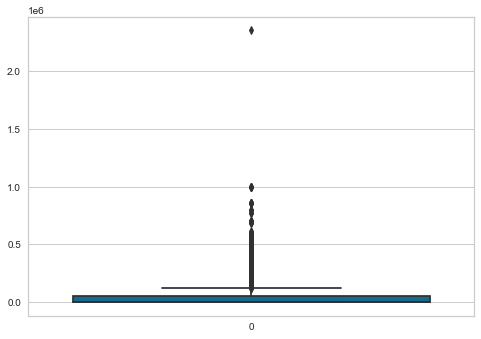

In [2117]:
sns.boxplot(df["v2a1"])

In [2118]:
df.shape

(7639, 92)

In [2119]:
df = df[df["v2a1"] < 100000]

In [2120]:
df = df[df["v2a1"] < 200000]

<AxesSubplot: >

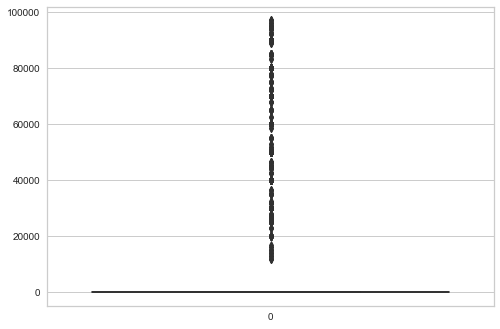

In [2121]:
sns.boxplot(df["v2a1"])

# Determing X and y

In [2122]:
X = df.drop(["target", "v2a1"], axis =1)

In [2123]:
y = df["target"]

In [2124]:
X

,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,r4h2,r4m1,r4m2,...,computer,television,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,rural,age
0,0,4,0,1,1,0,0,1,0,1,...,0,0,3,1,0,0,0,0,1,43
1,0,8,0,1,1,1,0,1,0,2,...,0,0,3,0,0,0,0,0,1,18
2,0,5,0,1,1,0,0,2,0,1,...,0,1,2,0,0,1,0,0,0,62
3,0,8,0,1,1,2,0,2,0,2,...,1,1,4,1,0,0,0,0,0,20
5,0,5,0,1,1,0,1,0,0,5,...,0,0,5,1,0,0,0,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7632,0,8,0,1,1,0,0,1,0,1,...,1,1,2,1,0,0,0,0,0,72
7633,0,4,0,1,1,1,0,1,1,1,...,0,1,2,0,0,0,1,0,0,4
7634,0,8,0,1,1,0,0,2,2,2,...,0,0,3,0,1,0,0,0,0,5
7636,0,9,0,1,1,0,0,3,1,1,...,0,0,3,1,0,0,0,0,0,16


# Min Max Scaler

In [2125]:
from sklearn.preprocessing import MinMaxScaler

In [2126]:
X_columns = X.columns

In [2127]:
min_max_scaler = MinMaxScaler()

In [2128]:
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns = X_columns)

In [2129]:
X

,hacdor,rooms,hacapo,v14a,refrig,v18q1,r4h1,r4h2,r4m1,r4m2,...,computer,television,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,rural,age
0,0.0,0.3,0.0,1.0,1.0,0.000000,0.0,0.125,0.000000,0.166667,...,0.0,0.0,0.3,1.0,0.0,0.0,0.0,0.0,1.0,0.443299
1,0.0,0.7,0.0,1.0,1.0,0.166667,0.0,0.125,0.000000,0.333333,...,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.185567
2,0.0,0.4,0.0,1.0,1.0,0.000000,0.0,0.250,0.000000,0.166667,...,0.0,1.0,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.639175
3,0.0,0.7,0.0,1.0,1.0,0.333333,0.0,0.250,0.000000,0.333333,...,1.0,1.0,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.206186
4,0.0,0.4,0.0,1.0,1.0,0.000000,0.2,0.000,0.000000,0.833333,...,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.257732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,0.0,0.7,0.0,1.0,1.0,0.000000,0.0,0.125,0.000000,0.166667,...,1.0,1.0,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.742268
6184,0.0,0.3,0.0,1.0,1.0,0.166667,0.0,0.125,0.166667,0.166667,...,0.0,1.0,0.2,0.0,0.0,0.0,1.0,0.0,0.0,0.041237
6185,0.0,0.7,0.0,1.0,1.0,0.000000,0.0,0.250,0.333333,0.333333,...,0.0,0.0,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.051546
6186,0.0,0.8,0.0,1.0,1.0,0.000000,0.0,0.375,0.166667,0.166667,...,0.0,0.0,0.3,1.0,0.0,0.0,0.0,0.0,0.0,0.164948


# Models that will be employed

In [2130]:
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2131]:
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
model_svm = svm.SVC()
model_knn= KNeighborsClassifier()
model_mlp = MLPClassifier()

# Train Test Split

In [2132]:
model__lr = []
model__rf = []
model__svm = []
model__knn = []
model__mlp = []

In [2133]:
from sklearn.model_selection import train_test_split

In [2134]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.3, stratify=y)

In [2135]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, stratify=y_)

In [2136]:
y_test.shape, X_test.shape

((929,), (929, 90))

In [2137]:
# Checking accuracy 

In [2138]:
from sklearn.metrics import accuracy_score

In [2139]:
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_val)
model__lr.append(accuracy_score(y_val, pred_lr))

In [2140]:
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_val)
model__rf.append(accuracy_score(y_val, pred_rf))

In [2141]:
model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_val)
model__svm.append(accuracy_score(y_val, pred_svm))

In [2142]:
model_knn.fit(X_train, y_train)
pred_knn = model_knn.predict(X_val)
model__knn.append(accuracy_score(y_val, pred_knn))

In [2143]:
model_mlp.fit(X_train, y_train)
pred_mlp = model_mlp.predict(X_val)
model__mlp.append(accuracy_score(y_val, pred_mlp))

In [2144]:
results_accuracy = pd.DataFrame(model__lr).rename(columns={0:"LR"})
results_accuracy["RF"] = model__rf
results_accuracy["SVM"] = model__svm
results_accuracy["KNN"] = model__knn
results_accuracy["MLP"] = model__mlp

In [2145]:
results_accuracy

,LR,RF,SVM,KNN,MLP
0,0.759698,0.87931,0.760776,0.765086,0.802802


# Tuning the model - Grid Search

In [2146]:
from sklearn.model_selection import GridSearchCV

In [2147]:
grid_model__lr = []
grid_model__rf = []
grid_model__svm = []
grid_model__knn = []
grid_model__mlp = []

In [2148]:
test_model__lr = []
test_model__rf = []
test_model__svm = []
test_model__knn = []
test_model__mlp = []

In [2149]:
grid_param_lr = { "C": [ 5], "penalty": ["l1"], "solver":  ["liblinear"]}
grid_param_rf = {'n_estimators': [220], "criterion": [ "entropy"], 'max_depth': [100], "max_features": ["auto"], 'min_samples_split': [2], 'min_samples_leaf': [1], 'max_depth': [100], 'bootstrap': [False]}
param_grid_knn = {'n_neighbors':[3], 'metric': ['euclidean']}
param_grid_svm = {'kernel': ['poly', 'linear', 'rbf'], 'C': [10], 'gamma':  [0.1]}
param_grid_mlp = {'hidden_layer_sizes': [(50,100,50)],'activation': ['logistic'],'alpha': [ 0.05],'learning_rate': ['adaptive'],'solver': ['adam']}

In [2150]:
grid_model_lr = GridSearchCV(LogisticRegression(), param_grid=grid_param_lr)

In [2151]:
grid_model_lr.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [5], 'penalty': ['l1'], 'solver': ['liblinear']})

In [2152]:
grid_model_lr.best_estimator_

LogisticRegression(C=5, penalty='l1', solver='liblinear')

In [2153]:
grid_pred_lr = grid_model_lr.predict(X_val)
grid_model__lr.append(accuracy_score(grid_pred_lr, y_val))

In [2154]:
#employing X_test
grid_pred_lr = grid_model_lr.predict(X_test)
test_model__lr.append(accuracy_score(grid_pred_lr, y_test))

In [2155]:
#Random Forrest

In [2156]:
grid_model_rf = GridSearchCV(model_rf, grid_param_rf)
grid_model_rf.fit(X_train, y_train)
grid_model_rf.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=100,
                       max_features='auto', n_estimators=220)

In [2157]:
grid_pred_rf = grid_model_rf.predict(X_val)

In [2158]:
grid_model__rf.append(accuracy_score(grid_pred_rf, y_val))

In [2159]:
#employing X_test
grid_pred_rf = grid_model_rf.predict(X_test)
test_model__rf.append(accuracy_score(grid_pred_rf, y_test))

In [2160]:
#KNN

In [2161]:
grid_model_knn = GridSearchCV(model_knn, param_grid_knn)
grid_model_knn.fit(X_train, y_train)
grid_model_knn.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [2162]:
grid_pred_knn = grid_model_knn.predict(X_val)
grid_model__knn.append(accuracy_score(grid_pred_knn, y_val))
accuracy_score(grid_pred_knn, y_val)

0.7618534482758621

In [2163]:
#employing X_test
grid_pred_knn = grid_model_knn.predict(X_test)
test_model__knn.append(accuracy_score(grid_pred_knn, y_test))

In [2164]:
#SVM

In [2165]:
grid_model_svm = GridSearchCV(model_svm, param_grid_svm)
grid_model_svm.fit(X_train, y_train)
grid_model_svm.best_estimator_

SVC(C=10, gamma=0.1)

In [2166]:
grid_pred_svm = grid_model_svm.predict(X_val)
grid_model__svm.append(accuracy_score(grid_pred_svm, y_val))

In [2167]:
#employing X_test
grid_pred_svm = grid_model_svm.predict(X_test)
test_model__svm.append(accuracy_score(grid_pred_svm, y_test))

In [2168]:
#MLP

In [2169]:
grid_model_mlp = GridSearchCV(model_mlp, param_grid_mlp)
grid_model_mlp.fit(X_val, y_val)
grid_model_mlp.best_estimator_

MLPClassifier(activation='logistic', alpha=0.05,
              hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive')

In [2170]:
grid_pred_mlp = grid_model_mlp.predict(X_val)
grid_model__mlp.append(accuracy_score(grid_pred_mlp, y_val))
accuracy_score(grid_pred_mlp, y_val)

0.78125

In [2171]:
#employing X_test
grid_pred_mlp = grid_model_mlp.predict(X_test)
test_model__mlp.append(accuracy_score(grid_pred_mlp, y_test))

In [2172]:
grid_result_accuracy = pd.DataFrame(grid_model__lr).rename(columns={0:"Grid_LR"})
grid_result_accuracy["Grid_RF"] = grid_model__rf
grid_result_accuracy["Grid_SVM"] = grid_model__svm
grid_result_accuracy["Grid_KNN"]= grid_model__knn
grid_result_accuracy["Grid_MLP"] = grid_model__mlp

In [2173]:
test_result_accuracy = pd.DataFrame(test_model__lr).rename(columns={0:"Test_LR"})
test_result_accuracy["Test_RF"] = test_model__rf
test_result_accuracy["Test_SVM"] = test_model__svm
test_result_accuracy["Test_KNN"]= test_model__knn
test_result_accuracy["Test_MLP"] = test_model__mlp

In [2174]:
results_accuracy

,LR,RF,SVM,KNN,MLP
0,0.759698,0.87931,0.760776,0.765086,0.802802


In [2175]:
grid_result_accuracy 

,Grid_LR,Grid_RF,Grid_SVM,Grid_KNN,Grid_MLP
0,0.755388,0.908405,0.813578,0.761853,0.78125


In [2176]:
test_result_accuracy

,Test_LR,Test_RF,Test_SVM,Test_KNN,Test_MLP
0,0.74704,0.931109,0.854682,0.786868,0.741658


In [2179]:
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), 
                                                    test_size=0.15, stratify=y)

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=1)

mean_val_acc = 0.0

for train_idxs, val_idxs in kf.split(X_train):
    X_t, X_v = X_train[train_idxs], X_train[val_idxs]
    y_t, y_v = y_train[train_idxs], y_train[val_idxs]
    grid_model_rf.fit(X_t, y_t)
    preds = grid_model_rf.predict(X_v)
    val_acc = np.mean(preds == y_v)
    print(f"Validation accuracy: {val_acc:.3f}")
    mean_val_acc += val_acc / k
print(f"Mean validation accuracy: {mean_val_acc:.3f}")       

Validation accuracy: 0.920
Validation accuracy: 0.904
Validation accuracy: 0.934
Validation accuracy: 0.905
Validation accuracy: 0.899
Mean validation accuracy: 0.913


In [ ]:
import pickle
with open('lidia_bestmodel_classifier.pkl', 'wb') as fid:
    pickle.dump(grid_model_rf, fid)    